# **Chapter 04:**
Data Cleaning and Preparation with Pandas

---



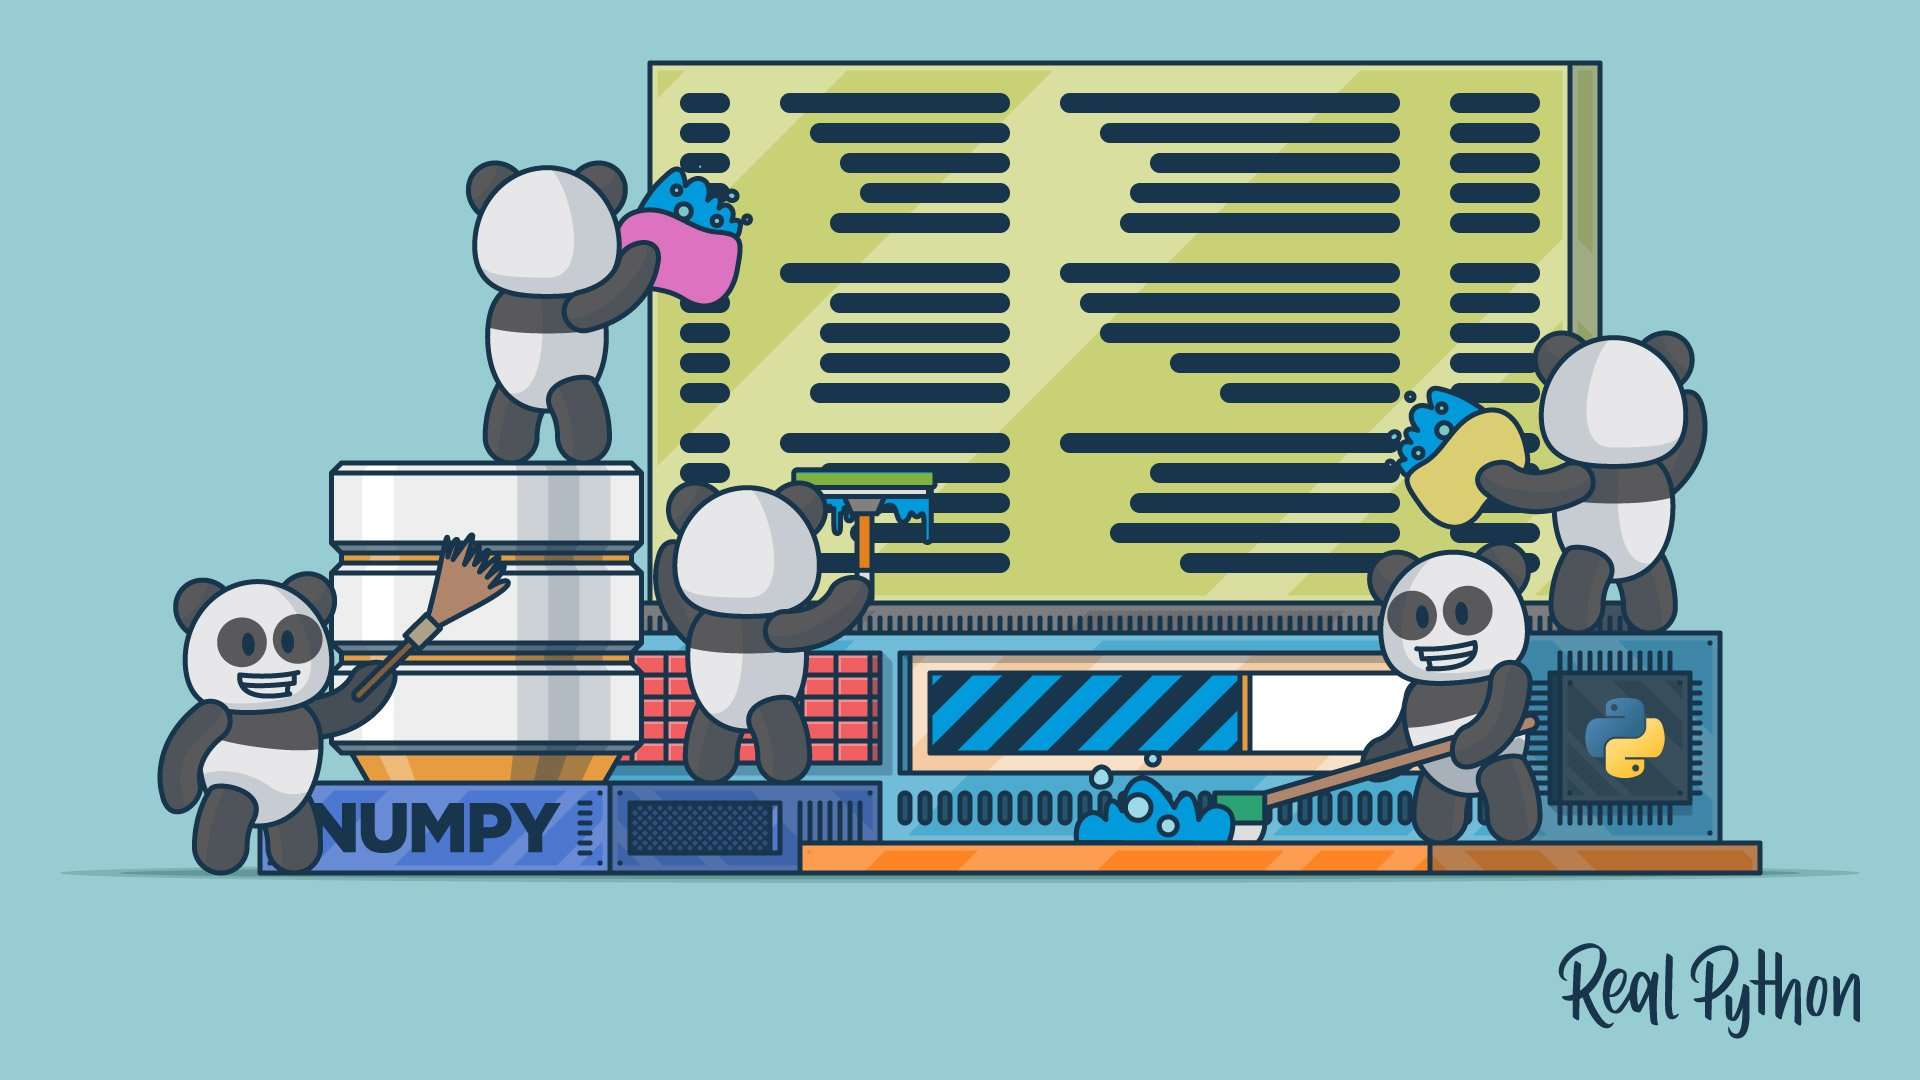

### What to look for?
* Missing Data
* Duplicated Data
* Outliers
* Type issues
* Inconsistant Data (eg : "Apple", "apple", "APPLE")
* Invalid Data (eg: “date of birth: male”, “address: -1234”)


## **LECTURE 01:** *Handling Missing Data*


### Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/DataAnalysis-with-Python

/content/drive/MyDrive/DataAnalysis-with-Python


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('titanic.csv')

### None: Pythonic missing data

* type object
* can't perform mathematical operations
* very expensive

In [98]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [99]:
vals1.sum()

TypeError: ignored

### NaN: Missing numerical data

In [104]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [100]:
1 + np.nan

nan

In [101]:
0 *  np.nan

nan

In [105]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [106]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### NaN and None with Pandas

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [107]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [108]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Operations

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed
- ``replace()``: Replace a string, regex, list, dictionary, series, number etc. from a dataframe.
- ``interpolate()``: Uses various interpolation technique to fill the missing values

isnull()

In [109]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

notnull()

In [ ]:
data.Age.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
data.Age[data.Age.notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Inconsistent null values

In [110]:
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":["#NA", 2, 54, 3, "na"],
                   "C":[20, 16, "not applicable", 3, "n/a"],
                   "D":[14, 3, np.nan, None, 6],
                   "E":["N/A", 13, 0, 9, "N/a"],
                   "F":[34, 14, 23, 1, 7]})
df.to_csv("clean_me.csv")

In [111]:
df = pd.read_csv("clean_me.csv", index_col=[0])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20,14.0,NaN,34
1,4.0,2,16,3.0,13,14
2,5.0,54,not applicable,NaN,0,23
3,NaN,3,3,NaN,9,1
4,1.0,na,NaN,6.0,N/a,7


In [112]:
df.isnull().sum()

A    1
B    1
C    1
D    2
E    1
F    0
dtype: int64

In [115]:
df = pd.read_csv("clean_me.csv", index_col=[0], na_values = ["N/a", "not applicable", "na"])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [116]:
df.isnull().sum()

A    1
B    2
C    2
D    2
E    2
F    0
dtype: int64

### Visualizing Missing Data

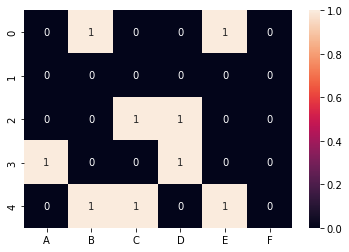

In [123]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

In [44]:
import missingno as msno

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


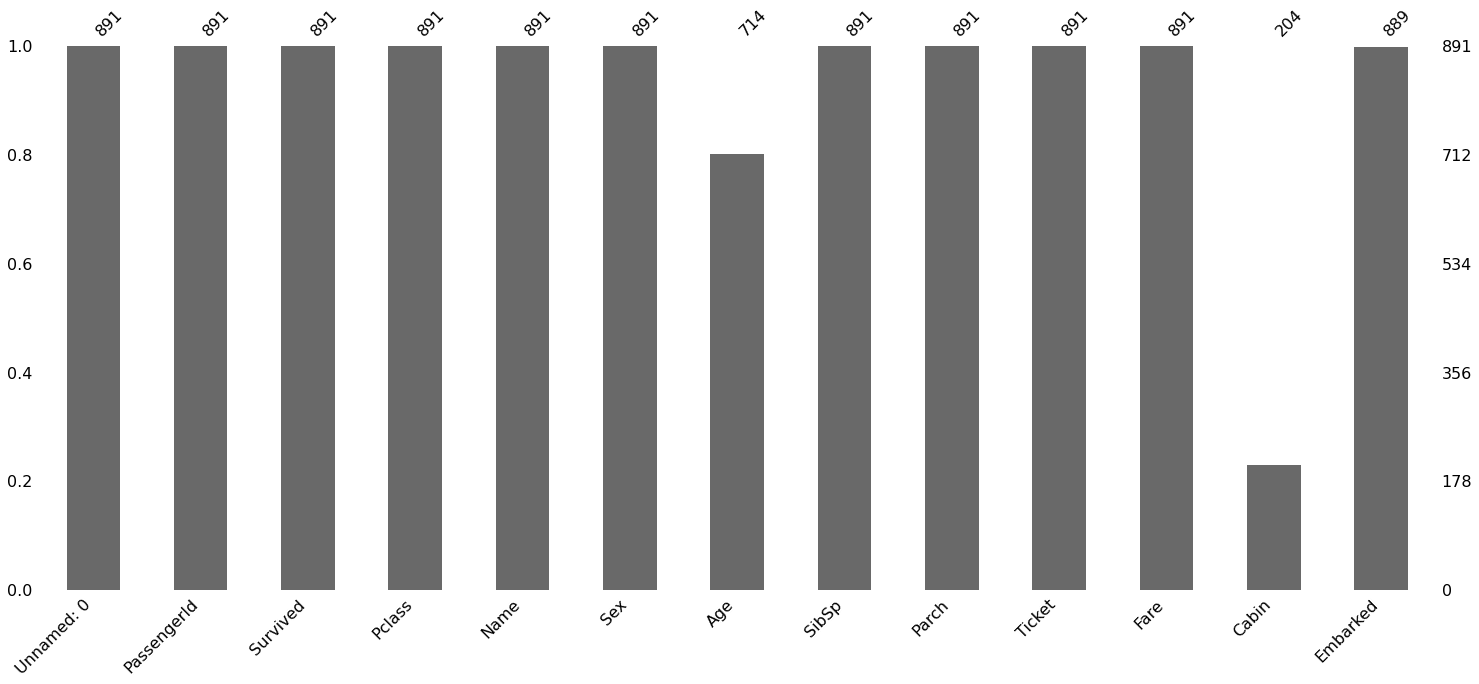

In [46]:
msno.bar(data)

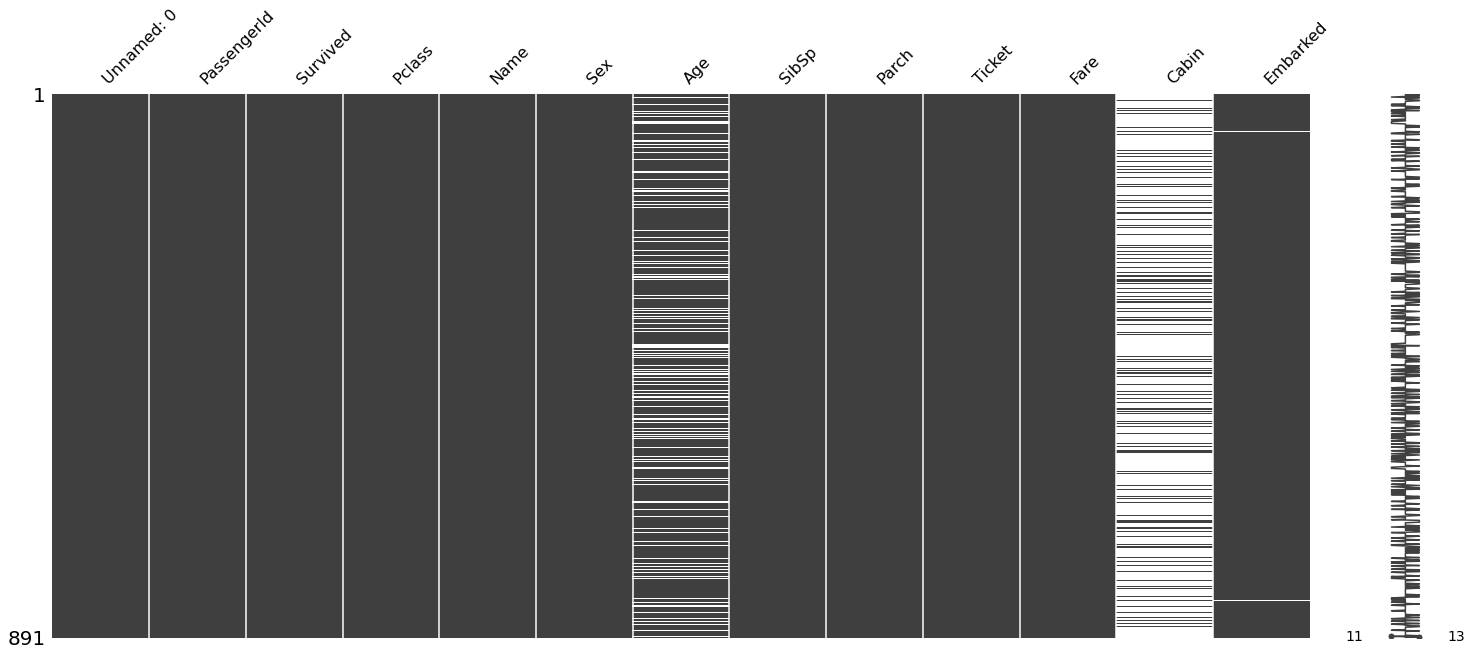

In [47]:
# Gives positional information of the missing values
msno.matrix(data)

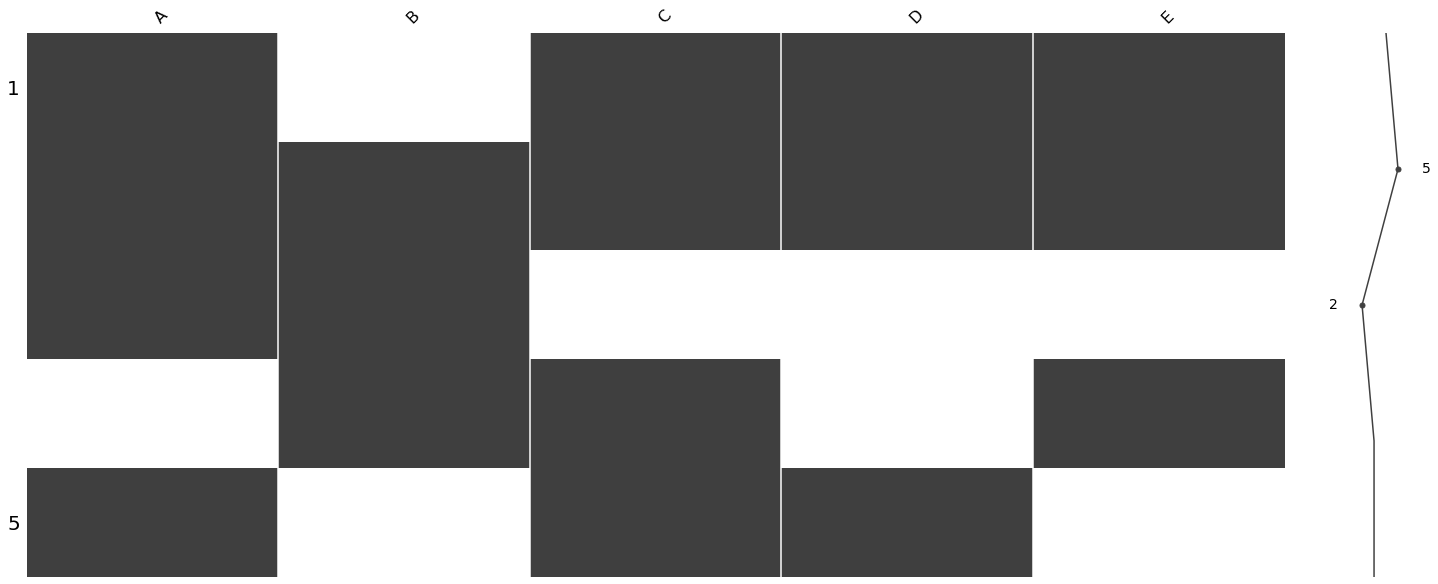

In [48]:
msno.matrix(df)

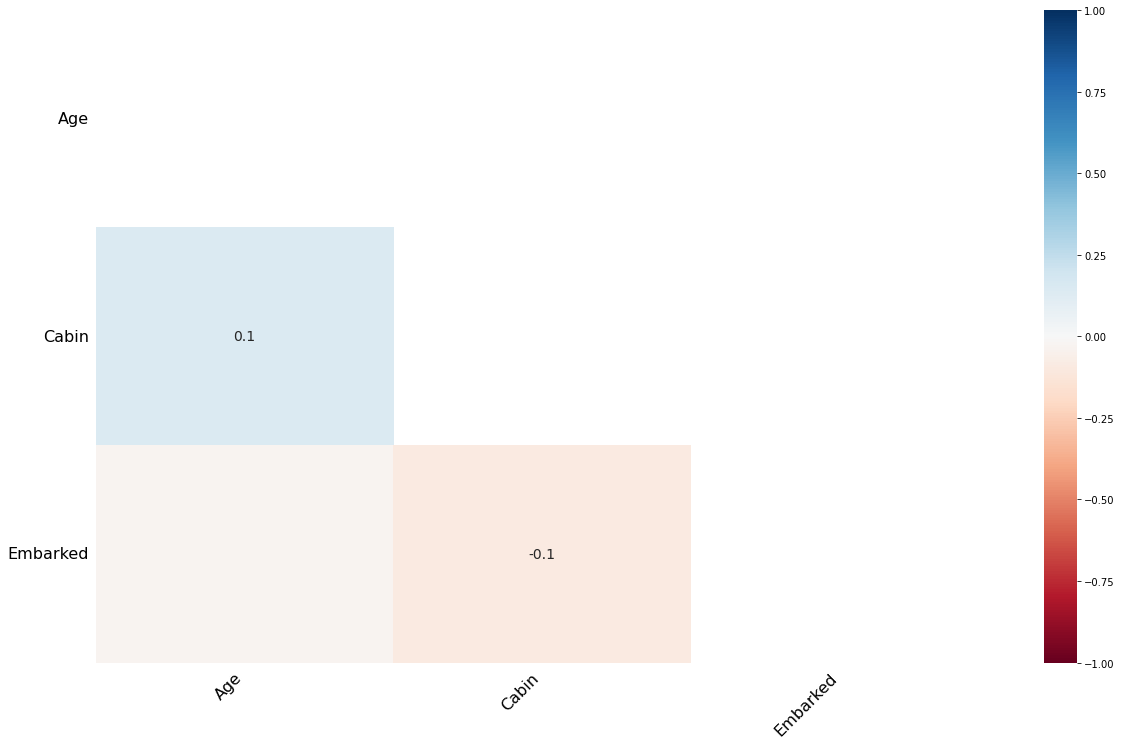

In [49]:
# Gives a heatmap of how missing values are related
msno.heatmap(data)

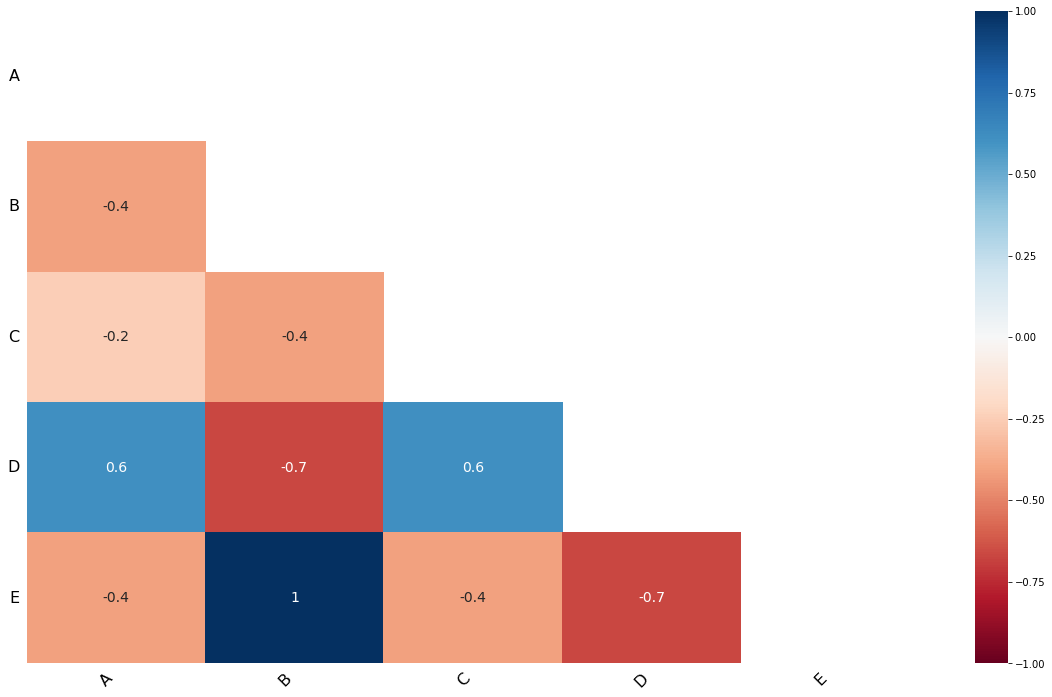

In [54]:
msno.heatmap(df)

In [125]:
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [127]:
# isnull().sum() will sum the number of missing values by columns
data_count_of_missval_by_col = (data.isnull().sum())
display(data_count_of_missval_by_col)

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
# below code will display only the columns with missing values (in absolute number of rows)
display(data_count_of_missval_by_col[data_count_of_missval_by_col > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64

In [129]:
# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(data_count_of_missval_by_col[data_count_of_missval_by_col > 0]/data.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

### Drop Missing Data

before dropping, ask yourself. Are you dropping an important data/class?

In [57]:
df.head()

,A,B,C,D,E
0,12.0,NaN,20.0,14.0,NaN
1,4.0,2.0,16.0,3.0,13.0
2,5.0,54.0,NaN,NaN,0.0
3,NaN,3.0,3.0,NaN,9.0
4,1.0,NaN,8.0,6.0,NaN


In [72]:
df.dropna()

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0


In [70]:
df.dropna(subset=['B'])

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0
2,5.0,54.0,NaN,NaN,0.0
3,NaN,3.0,3.0,NaN,9.0


In [81]:
df.dropna(axis='columns')

,F
0,34
1,14
2,23
3,1
4,7


In [85]:
df.dropna(axis='columns', how='all')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [84]:
df.dropna(axis='rows', thresh=4)

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1


drop if a column have less then 4 non-null values

In [86]:
df.dropna(axis='columns', thresh=4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


drop if a column has less then 80% of non-null values  
    OR  
drop if a column has only 20% of non-null values

In [87]:
df.dropna(axis=1, thresh = int(0.8*df.shape[0])) # thresh = 4

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


In [93]:
df.dropna(axis=1, thresh = 4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


## **LECTURE 02:** *Removing duplicate values*

## **LECTURE 03:** *Interpolating Data*

## **LECTURE 00:** *Parsing Dates*

## **LECTURE 00:** *Detecting and Filtering Outliers*

## **LECTURE 00:** *Regular Expressions*